In [ ]:
!pip install scikit-learn xgboost seaborn matplotlib pandas numpy


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


In [ ]:
df = pd.read_csv("/content/Fertilizer Prediction.csv")


In [ ]:
df.head()
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


,0
Temparature,0
Humidity,0
Moisture,0
Soil Type,0
Crop Type,0
Nitrogen,0
Potassium,0
Phosphorous,0
Fertilizer Name,0


In [ ]:
le = LabelEncoder()

df["Soil Type"] = le.fit_transform(df["Soil Type"])
print("Soil type mappings:")
for index, soil in enumerate(le.classes_):
    print(f"{soil} : {index}")

df["Crop Type"] = le.fit_transform(df["Crop Type"])
print("Crop mappings:")
for index, crop in enumerate(le.classes_):
    print(f"{crop} : {index}")

df["Fertilizer Name"] = le.fit_transform(df["Fertilizer Name"])
print("Fertilizer mappings:")
for index, fertilizer in enumerate(le.classes_):
    print(f"{fertilizer} : {index}")



Soil type mappings:
Black : 0
Clayey : 1
Loamy : 2
Red : 3
Sandy : 4
Crop mappings:
Barley : 0
Cotton : 1
Ground Nuts : 2
Maize : 3
Millets : 4
Oil seeds : 5
Paddy : 6
Pulses : 7
Sugarcane : 8
Tobacco : 9
Wheat : 10
Fertilizer mappings:
10-26-26 : 0
14-35-14 : 1
17-17-17 : 2
20-20 : 3
28-28 : 4
DAP : 5
Urea : 6


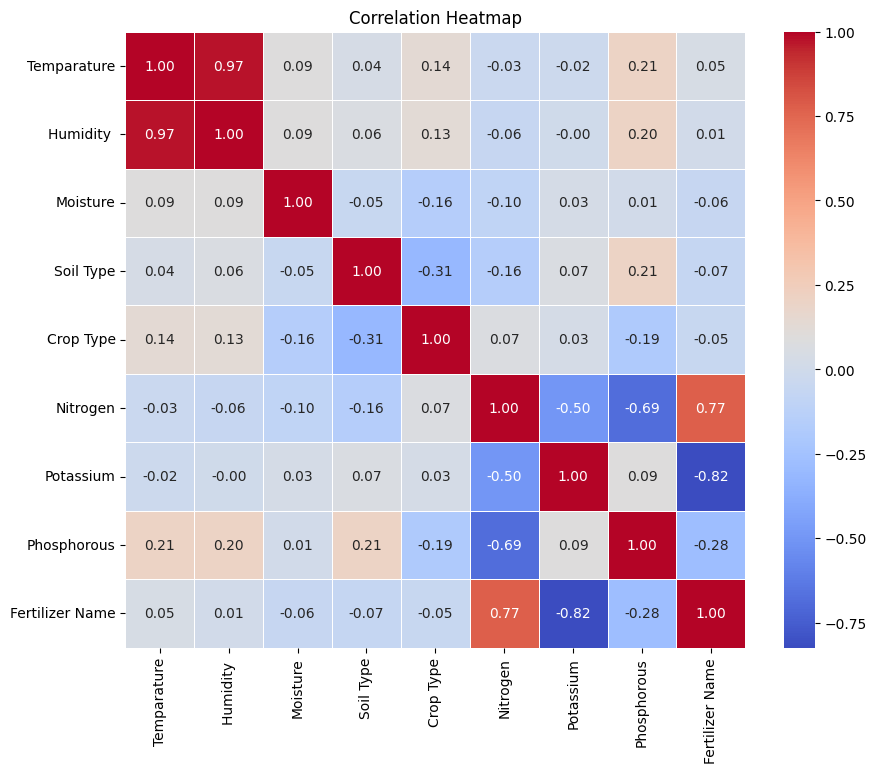

In [ ]:
#Visualize Data - Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
X = df.drop(columns=["Fertilizer Name"])  # Features
y = df["Fertilizer Name"]  # Target variable


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Train the Machine Learning Models
1. XGBoost Model
2. Decision Tree Classifier
3. Random Forest Classifier

In [ ]:
# 1. XGBoost Model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print("XGBoost Accuracy:", accuracy_xgb)
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.95
[[2 1 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 4]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4

    accuracy                           0.95        20
   macro avg       0.97      0.95      0.96        20
weighted avg       0.96      0.95      0.95        20



In [ ]:
# 2. Decision Tree Classifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print("Decision Tree Accuracy:", accuracy_tree)
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 0.9
[[2 0 1 0 0 0 0]
 [0 3 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 4]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      0.75      0.86         4
           2       0.33      1.00      0.50         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4

    accuracy                           0.90        20
   macro avg       0.90      0.92      0.88        20
weighted avg       0.97      0.90      0.92        20



In [ ]:
#3. Random Forest Classifier

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0
[[3 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
#Save the Trained Model
#Save the best-performing model - Random Forest

pickle.dump(random_forest_model, open('/content/model.pkl', 'wb'))


In [ ]:
#Load the model for later use:

model = pickle.load(open('/content/model.pkl', 'rb'))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pickle

# Updated soil and crop types
available_soil_types = ['Sandy', 'Loamy', 'Black', 'Red', 'Clayey']
available_crop_types = ['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley', 'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts']

# Load dataset
df = pd.read_csv("/content/Fertilizer Prediction.csv")

# Encoding manually defined soil and crop types
le_soil = LabelEncoder()
df["Soil Type"] = le_soil.fit_transform(df["Soil Type"])

le_crop = LabelEncoder()
df["Crop Type"] = le_crop.fit_transform(df["Crop Type"])

# Fertilizer names mapping
fertilizer_names = ['10-26-26', '14-35-14', '17-17-17', '20-20', '28-28', 'DAP', 'Urea']
fertilizer_mapping = {name: index for index, name in enumerate(fertilizer_names)}
reverse_fertilizer_mapping = {index: name for index, name in enumerate(fertilizer_names)}

# Print mappings
print("Available Soil Types:", available_soil_types)
print("Available Crop Types:", available_crop_types)
print("\nFertilizer Name Mappings:")
for index, name in reverse_fertilizer_mapping.items():
    print(f"{index} : {name}")

# Load trained model
model = pickle.load(open('model.pkl', 'rb'))

# Function to take user input and predict fertilizer recommendation
def recommend_fertilizer(model, available_soil_types, available_crop_types, reverse_fertilizer_mapping):
    print("\n🌱 Enter the details to get a Fertilizer Recommendation 🌱\n")

    # Taking user inputs
    temperature = float(input("Enter Temperature (°C): "))
    humidity = float(input("Enter Humidity (%): "))
    moisture = float(input("Enter Moisture (%): "))

    # Display available soil types and get user input
    print("\nAvailable Soil Types:", available_soil_types)
    soil_type = input("Enter Soil Type from above options: ")

    if soil_type not in available_soil_types:
        print("❌ Invalid Soil Type! Please enter a valid option.")
        return
    soil_encoded = available_soil_types.index(soil_type)

    # Display available crop types and get user input
    print("\nAvailable Crop Types:", available_crop_types)
    crop_type = input("Enter Crop Type from above options: ")

    if crop_type not in available_crop_types:
        print("❌ Invalid Crop Type! Please enter a valid option.")
        return
    crop_encoded = available_crop_types.index(crop_type)

    nitrogen = float(input("Enter Nitrogen content (N): "))
    phosphorus = float(input("Enter Phosphorus content (P): "))
    potassium = float(input("Enter Potassium content (K): "))

    # Creating input array for prediction
    user_data = np.array([[temperature, humidity, moisture, soil_encoded, crop_encoded, nitrogen, phosphorus, potassium]])

    # Predicting the fertilizer (encoded value)
    predicted_fertilizer_encoded = model.predict(user_data)[0]

    # Decoding to get the actual fertilizer name
    predicted_fertilizer = reverse_fertilizer_mapping.get(predicted_fertilizer_encoded, "Unknown Fertilizer")

    print("\n✅ Recommended Fertilizer:", predicted_fertilizer)

# Call the function for user input and prediction
recommend_fertilizer(model, available_soil_types, available_crop_types, reverse_fertilizer_mapping)
0

Available Soil Types: ['Sandy', 'Loamy', 'Black', 'Red', 'Clayey']
Available Crop Types: ['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley', 'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts']

Fertilizer Name Mappings:
0 : 10-26-26
1 : 14-35-14
2 : 17-17-17
3 : 20-20
4 : 28-28
5 : DAP
6 : Urea

🌱 Enter the details to get a Fertilizer Recommendation 🌱

Enter Temperature (°C): 26
Enter Humidity (%): 52
Enter Moisture (%): 38

Available Soil Types: ['Sandy', 'Loamy', 'Black', 'Red', 'Clayey']
Enter Soil Type from above options: Sandy

Available Crop Types: ['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley', 'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts']
Enter Crop Type from above options: Maize
Enter Nitrogen content (N): 37
Enter Phosphorus content (P): 0
Enter Potassium content (K): 0

✅ Recommended Fertilizer: Urea


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = df.drop(columns=["Fertilizer Name"])
y = df["Fertilizer Name"]

# Split into train & test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)  # Assuming the model is already defined

# Make predictions
y_pred = model.predict(X_test)

# Calculate Accuracy Metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 6: Print Metrics
print(f"✅ Model Accuracy: {accuracy * 100:.2f}%")
print("\n🔹 Classification Report:\n", classification_rep)
print("\n🔹 Confusion Matrix:\n", conf_matrix)


✅ Model Accuracy: 95.00%

🔹 Classification Report:
               precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       1.00      1.00      1.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.86      0.79      0.81        20
weighted avg       1.00      0.95      0.97        20


🔹 Confusion Matrix:
 [[1 0 1 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 5 0]
 [0 0 0 0 0 0 6]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
